# Aspects of time series analysis

In [ ]:
#!pip install statsmodels

In [2]:
import sys
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns

1. Trend, Seasonality, and Residual

Text(0, 0.5, 'electricity consumption')

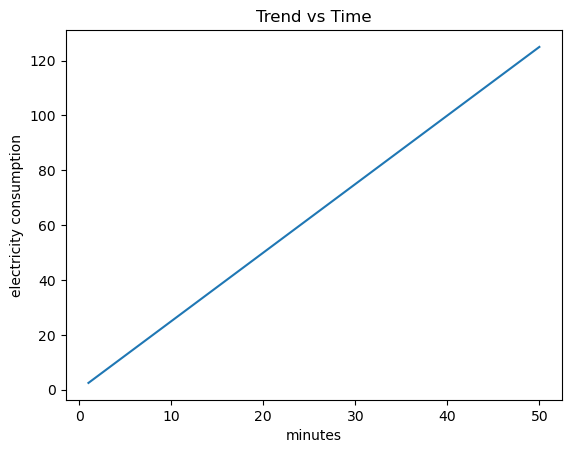

In [ ]:
# trend (simple) = time * slope
time = np.arange(1,51)
trend = time * 2.5

# Mock plot
plt.plot(time, trend)
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity consumption")

Text(0, 0.5, 'electricity consumption')

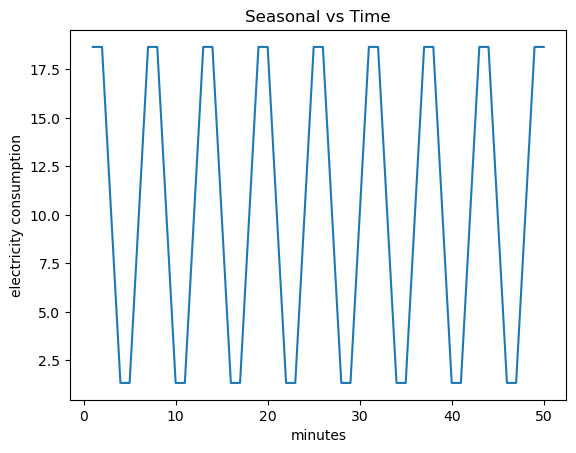

In [11]:
# seasonality = base + sin( time * (2π) / period ) * amplitude
seasonal = 10 + np.sin(time * (2*np.pi)/6) * 10

plt.plot(time, seasonal)
plt.title("Seasonal vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity consumption")

Text(0, 0.5, 'electricity consumption')

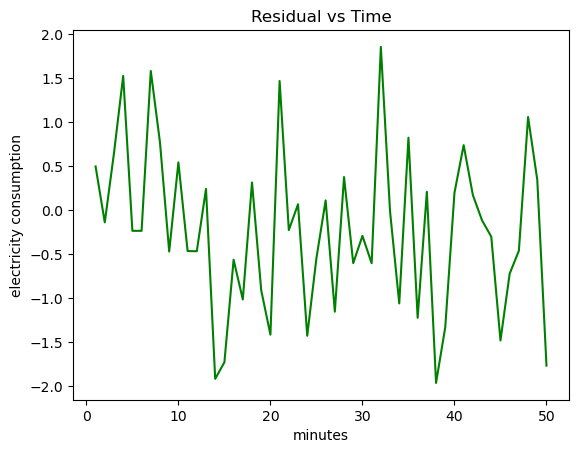

In [37]:
# residual: random noise
# ideally, we would like the nature of the noise to stay the same for time series analysis

np.random.seed(42) # set random seed for reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

plt.plot(time, residual, 'g')
plt.title("Residual vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity consumption")

2. Aggregating Trend, Seasonality, and Residual Components

Text(0, 0.5, 'electricity consumption')

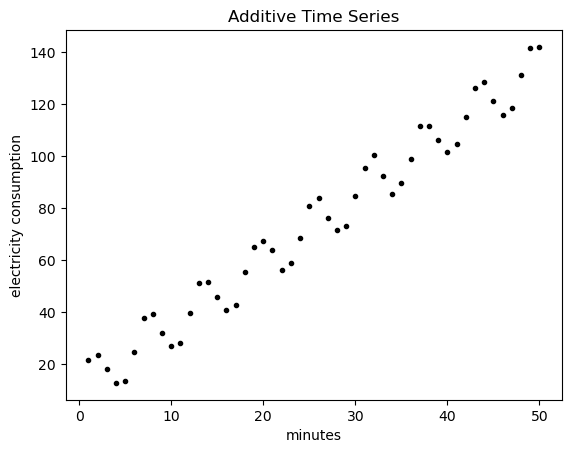

In [ ]:
# Additive time series
additive = trend + seasonal + residual

plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity consumption")

Text(0, 0.5, 'electricity consumption')

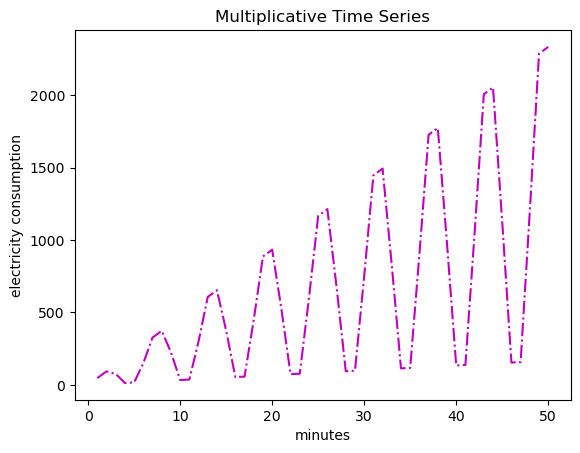

In [45]:
# Multiplicative time series

#ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual) #always 1
multiplicative = trend * seasonal * ignored_residual 


plt.plot(time, multiplicative, 'm-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity consumption")

# 3. Time Series Decomposition
Seperating Trend, Seasonality, Residual

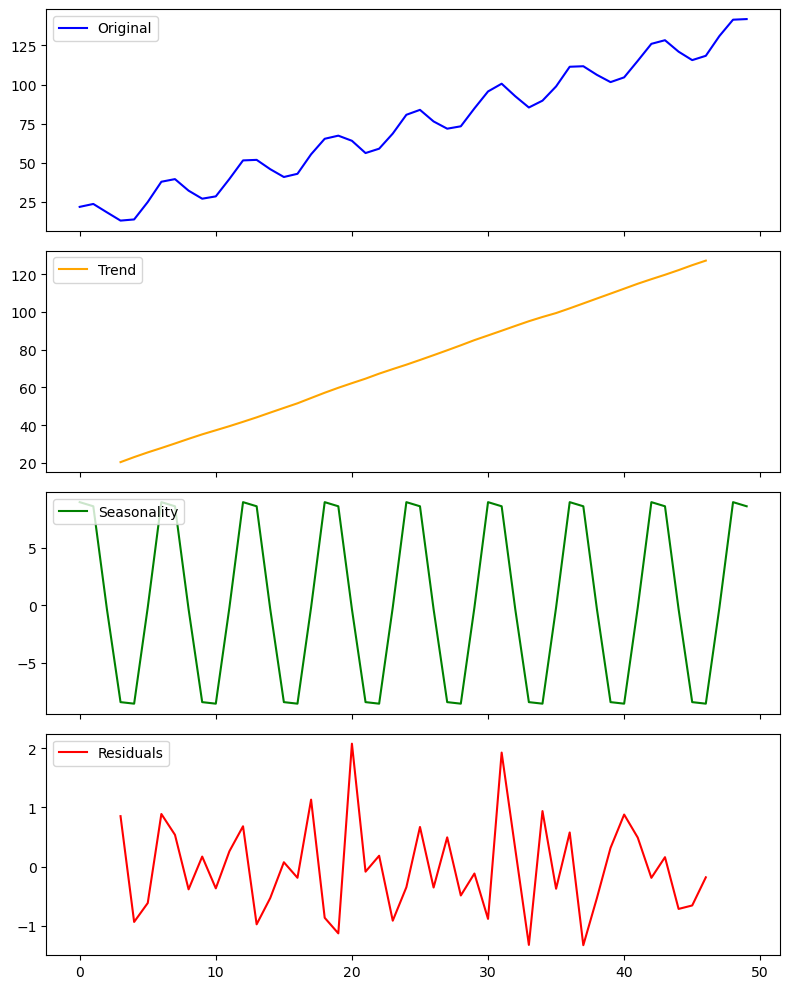

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(additive, model='additive', period=6) # period is set to 6 as we know the seasonality repeats every 6 time units
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

# Plotting the decomposed components
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(8)

axes[0].plot(additive, label='Original', color='blue')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend, label='Trend', color='orange')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal, label='Seasonality', color='green')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual, label='Residuals', color='red')
axes[3].legend(loc='upper left')

plt.tight_layout()

# 4. Example with real data.
In this section we will use statsmodels library to mess with air passenger data: https://www.kaggle.com/datasets/rakannimer/air-passengers

In [3]:
import kagglehub

data_path = kagglehub.dataset_download("rakannimer/air-passengers")
air_passengers = pd.read_csv(os.path.join(data_path, 'AirPassengers.csv'))

air_passengers['Month'] = pd.to_datetime(air_passengers['Month']) # convert from string to datetime
air_passengers.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0.5, 1.0, 'Air Passengers Over Time')

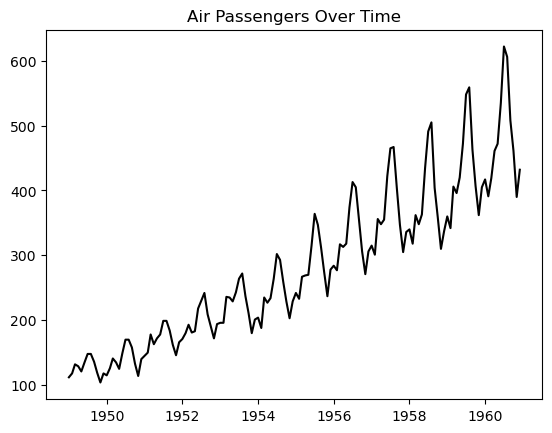

In [62]:
time = np.array(air_passengers['Month'], dtype='datetime64[M]')
passengers = np.array(air_passengers['#Passengers'])
plt.plot(time, passengers, 'k-')
plt.title("Air Passengers Over Time")

multiplicative!
--------------------------------------------------------------------

Plotting ACF...


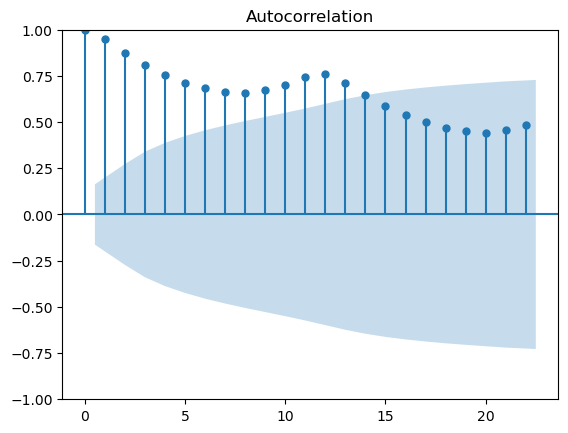

From the ACF plot, we can see that there is a significant peak at period=12, indicating a yearly seasonality with a period of 12 months.
--------------------------------------------------------------------

Decomposing...


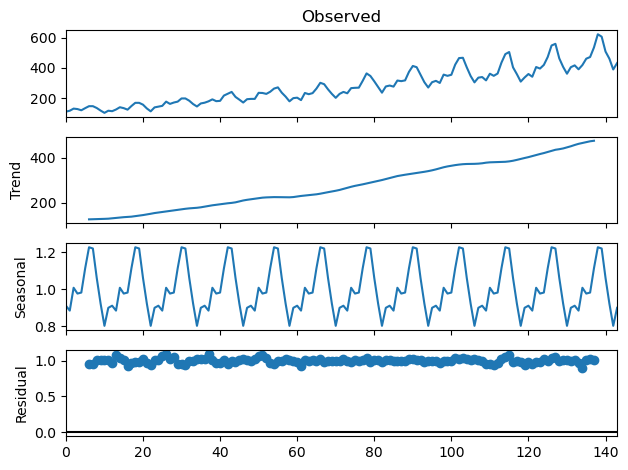

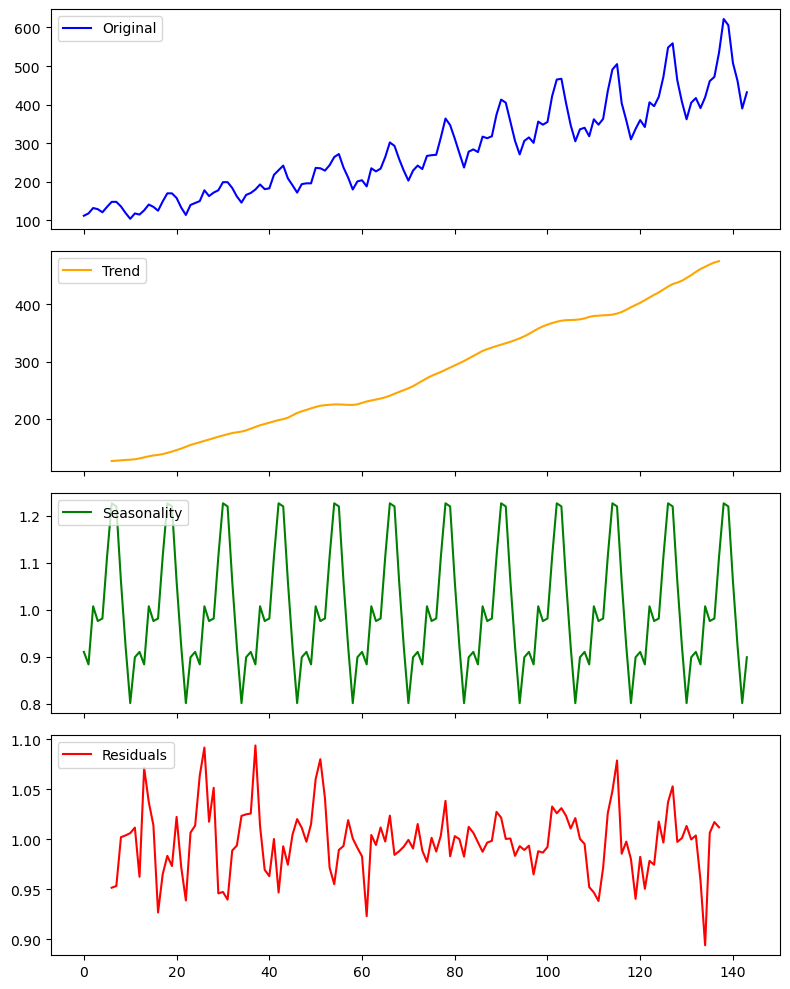

In [80]:
# We will answer thse following questions:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Is this time series additive or multiplicative?
print ("multiplicative!")
print ("--------------------------------------------------------------------\n")

# 2. Frequency of seasonality? (period) -> use autocorrelation plot (or partial autocorrelation plot)
print ("Plotting ACF...")
plot_acf(passengers)
plt.show()
print ("From the ACF plot, we can see that there is a significant peak at period=12, indicating a yearly seasonality with a period of 12 months.")
print ("--------------------------------------------------------------------\n")

# 3. What are the trend, seasonality, and residual components?
print ("Decomposing...")
result = seasonal_decompose(passengers, model='multiplicative', period=12)
result.plot()
plt.show()

# A better graphical representation
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(8)
axes[0].plot(passengers, label='Original', color='blue')
axes[0].legend(loc='upper left')
axes[1].plot(result.trend, label='Trend', color='orange')
axes[1].legend(loc='upper left')
axes[2].plot(result.seasonal, label='Seasonality', color='green')
axes[2].legend(loc='upper left')
axes[3].plot(result.resid, label='Residuals', color='red')
axes[3].legend(loc='upper left')
plt.tight_layout()

# Smoothing
What is smoothing? 
Any data collection process is subjected to noise which obscures useful pattern
-> we use smoothing techniques to extract those patterns

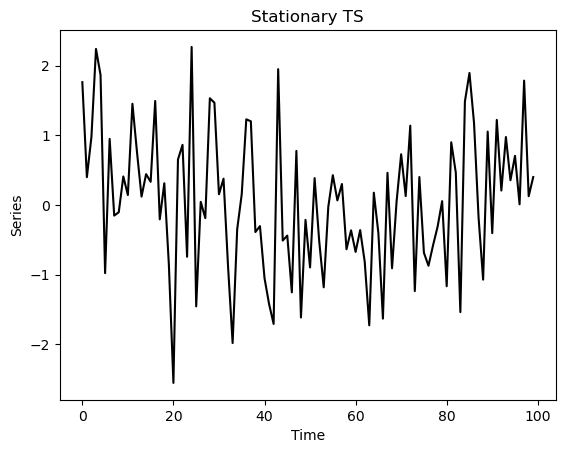

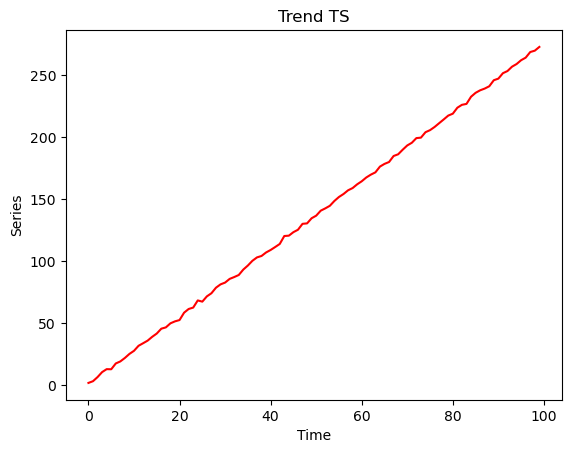

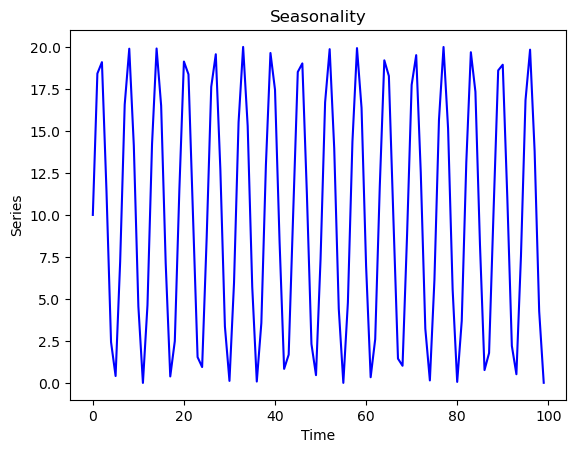

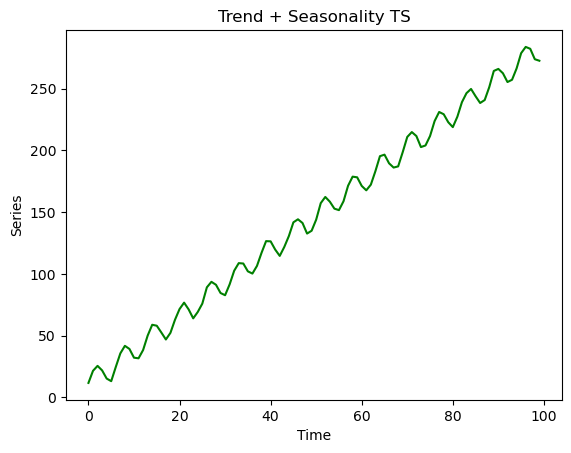

In [12]:
# Create a simple time series having stationary, trend, 
np.random.seed(0)  

time = np.arange(100)
stationary = np.random.normal(loc=0.0, scale=1.0, size=len(time))
plt.plot(time, stationary, 'k-')
plt.title("Stationary TS")
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()

# Trend
trend = (time * 2.75) + stationary
plt.plot(time, trend, 'r-')
plt.title("Trend TS")
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()

# Seasonality
seasonal = 10 + np.sin(time) * 10 
plt.plot(time, seasonal, 'b-')
plt.title("Seasonality")
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()

# Trend + Seasonality
trend_seasonal = trend + seasonal
plt.plot(time, trend_seasonal, 'g-')
plt.title("Trend + Seasonality TS")
plt.xlabel("Time")
plt.ylabel("Series")
plt.show()
